# How does the Maracaibo lake cover change V15--> V20?

In [104]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def correct_longitude(ds):   
    """Function to convert longitude from long3 to long1"""
    
    return ds.assign_coords({"longitude": (((ds.longitude + 180) % 360) - 180)})


def plot_map(ds,z,vmin,vmax,cmap,logscale,title,limits,markersize):
    
    """Function to plot grid points as a scatter map."""

    try:
        x = ds.longitude
        y = ds.latitude
    except: #different sources call lat/lon different things
        x = ds.longitude_ERA
        y = ds.latitude_ERA
    
    z1 = ds[z]
    

    
    #Setup figure and axes
    fig = plt.figure(figsize=[30,20])
    gs = GridSpec(1, 2, figure=fig, width_ratios=[50,1])
    ax = fig.add_subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=0))
    cax = fig.add_subplot(gs[1])
    
    #Cmaps, normalisations
    if logscale:
        norm = mc.LogNorm(vmin=vmin, vmax=vmax)
        z1 = abs(z1)
    else:
        norm = mc.Normalize(vmin=vmin, vmax=vmax)

    
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
    
    
    
    #Plot it
    sc=ax.scatter(x,y,s=markersize,c=cmap(norm(z1)),
                linewidths=1, alpha=.7)

    
    #Tidy up
    ax.axhline(70, c='0.5', linestyle='--')
    ax.axhline(-70, c='0.5', linestyle='--') #latitude cutoffs

    ax.set_title(title)    
    ax.coastlines()

    
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.set_aspect('auto') #Force projection aspect ratio
    
    if limits is not None:
        ax.set_xlim(limits['xlow'],limits['xhigh'])
        ax.set_ylim(limits['ylow'],limits['yhigh'])
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
    
def load_file(path):
    
    print(f'Loading file: {path}')
    ds = xr.open_dataset(path,engine='cfgrib',backend_kwargs={'indexpath': ''})
    
    ds = correct_longitude(ds) #long3 to long1
    
    return ds

In [105]:
#Roughly, what are the bounding coordinates of the Maracaibo lake?
xlow = -72.2
xhigh = -71
ylow = 8.5
yhigh=11.5
limits = {'xlow': xlow,
           'xhigh':xhigh,
           'ylow':ylow,
           'yhigh':yhigh}

In [115]:
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/' #path to data directory
ds_v15 = load_file(root+f'climate.v015/climate.v015/639l_2/clake')
ds_v20 = load_file(root+f'climate.v020/climate.v020/639l_2/clake')

Loading file: /network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/climate.v015/climate.v015/639l_2/clake
Loading file: /network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/climate.v020/climate.v020/639l_2/clake


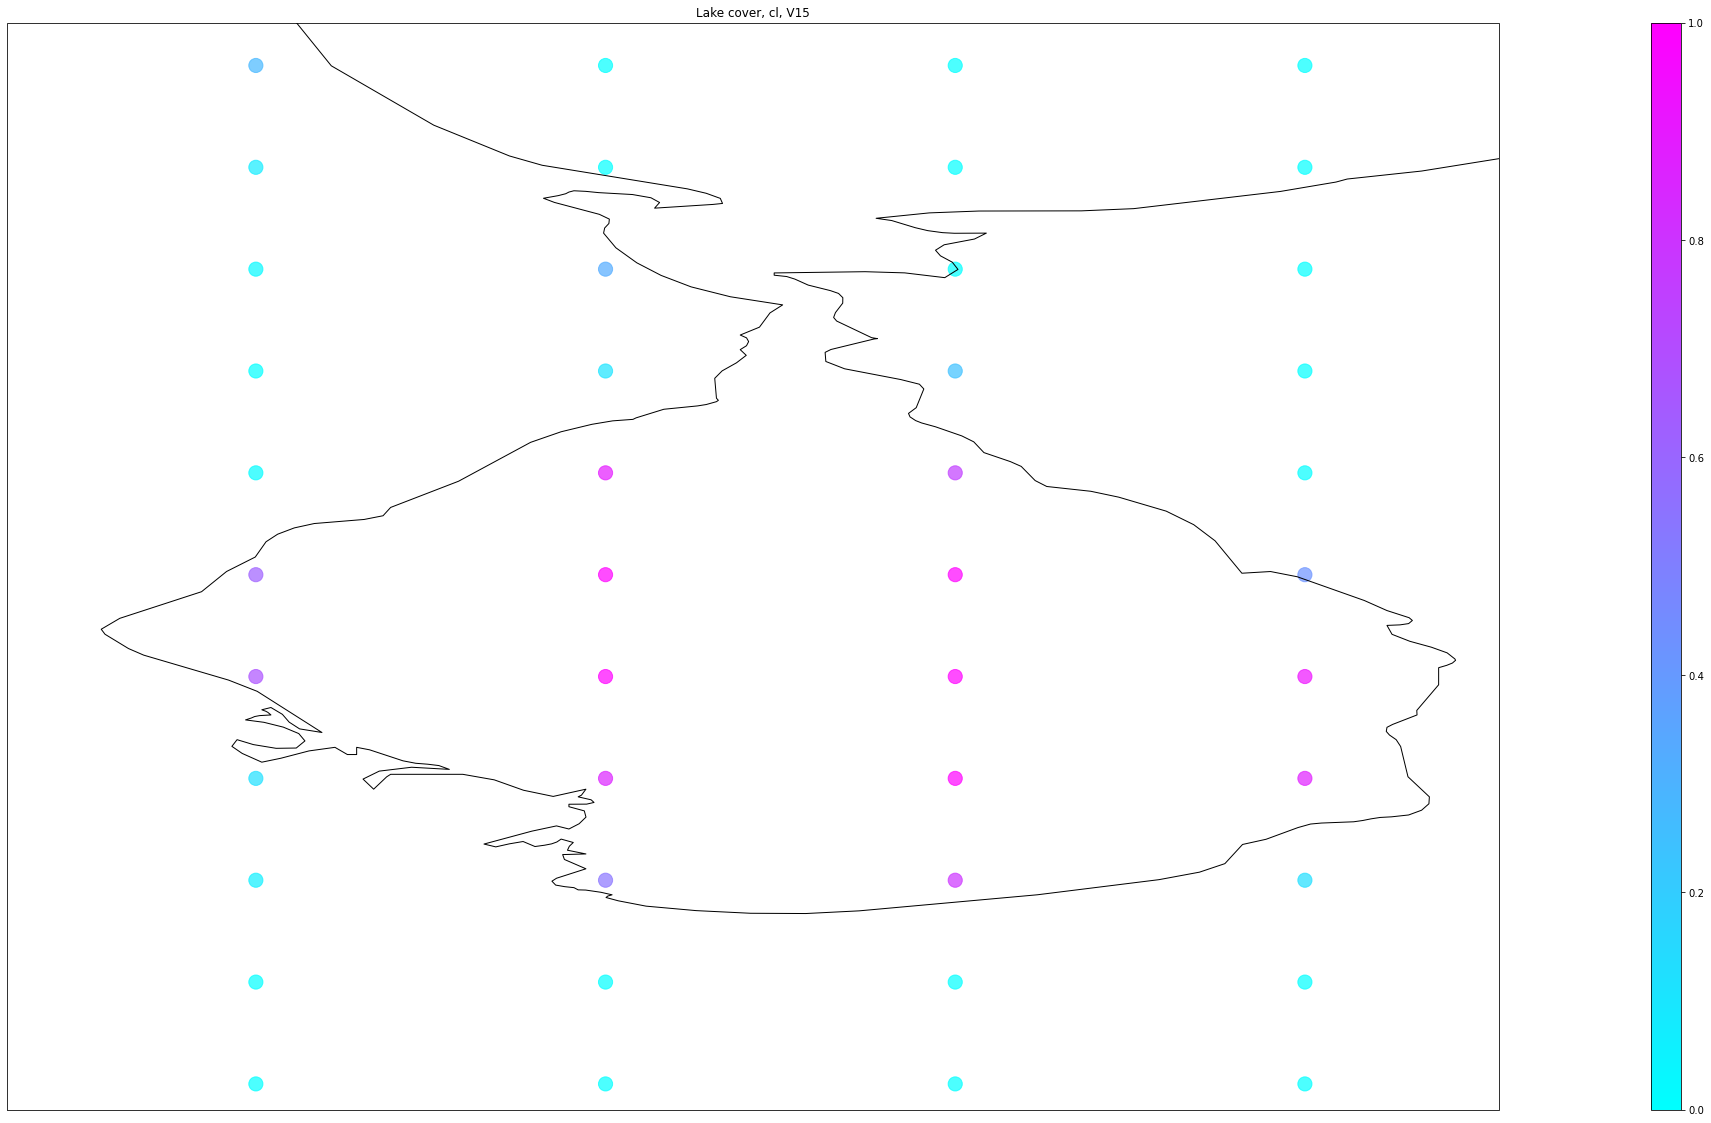

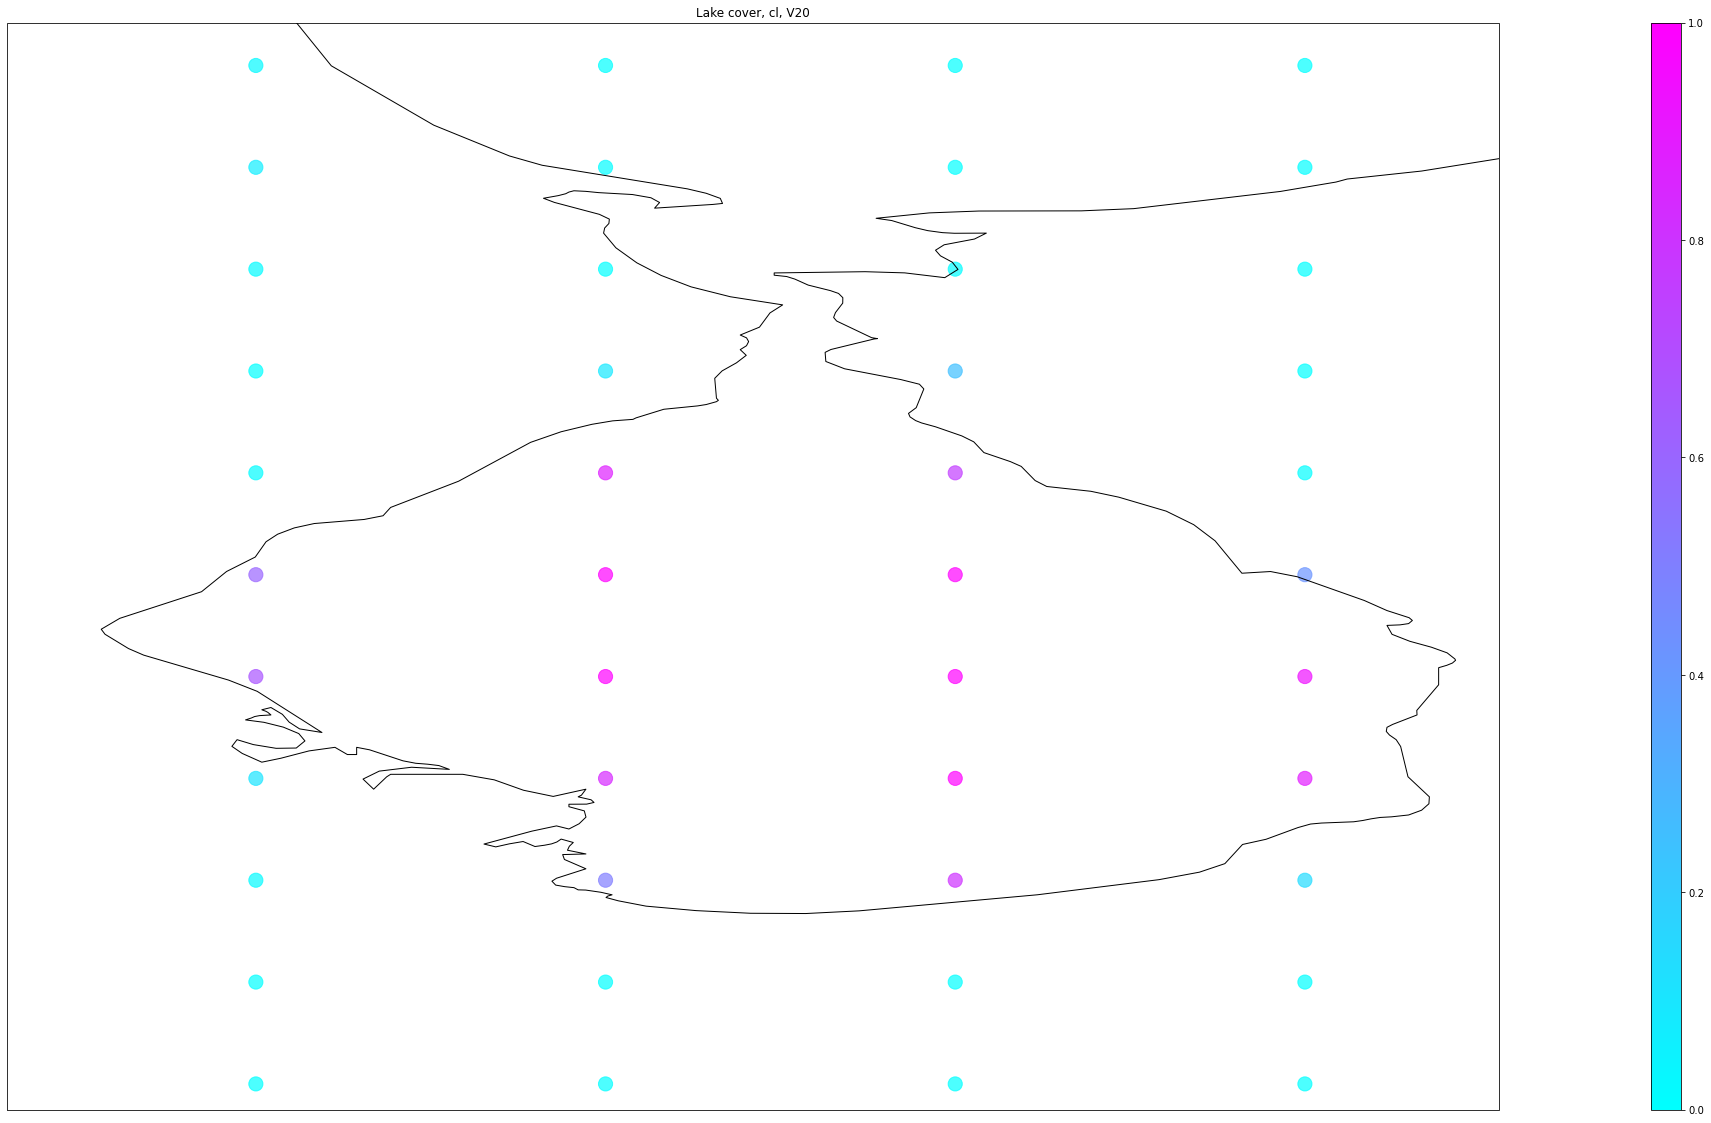

In [116]:
plot_map(ds_v15,'cl',vmin=0,vmax=1,cmap=plt.cm.cool,logscale=False,title='Lake cover, cl, V15',limits=limits,markersize=200)
plot_map(ds_v20,'cl',vmin=0,vmax=1,cmap=plt.cm.cool,logscale=False,title='Lake cover, cl, V20',limits=limits,markersize=200)

In [112]:
#Create a df just for maracaibo
change_in_cl = ds_v20-ds_v15
change_in_cl_df = change_in_cl.to_dataframe().reset_index()
change_in_cl_df = change_in_cl_df.rename(columns={"cl": "change_in_cl"})
change_in_cl_df['cl_v20'] = ds_v20.cl
change_in_cl_df['cl_v15'] = ds_v15.cl

maracaibo = change_in_cl_df.query(f"{ylow} < latitude < {yhigh} & {xlow} < longitude < {xhigh} ")

In [114]:
display(maracaibo.sort_values(by=['change_in_cl']))


,values,step,surface,latitude,longitude,change_in_cl,cl_v20,cl_v15
222145,222145,0 days,0.0,10.819669,-71.71875,-0.326653,0.000414,0.327067
219584,219584,0 days,0.0,11.381730,-72.00000,-0.257523,0.021029,0.278552
229824,229824,0 days,0.0,9.133487,-72.00000,-0.044060,0.017981,0.062041
229825,229825,0 days,0.0,9.133487,-71.71875,-0.037196,0.504095,0.541291
224705,224705,0 days,0.0,10.257608,-71.71875,-0.020384,0.874438,0.894822
223425,223425,0 days,0.0,10.538638,-71.71875,-0.019687,0.086901,0.106588
228545,228545,0 days,0.0,9.414517,-71.71875,-0.018217,0.842405,0.860622
225984,225984,0 days,0.0,9.976578,-72.00000,-0.017089,0.604839,0.621927
228544,228544,0 days,0.0,9.414517,-72.00000,-0.015170,0.102542,0.117711
220864,220864,0 days,0.0,11.100699,-72.00000,-0.009561,0.063719,0.073280
